<a href="https://colab.research.google.com/github/taropafadzw/in-god-i-trust/blob/master/letwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
train_path = "/content/drive/My Drive/flowers/traini"
test_path = "/content/drive/My Drive/flowers/test"
valid_path = "/content/drive/My Drive/flowers/valid"

In [28]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)   

Found 3022 images belonging to 5 classes.
Found 800 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [29]:
mobile = keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [30]:
x = mobile.layers[-6].output

In [31]:
output = Dense(units=5, activation='softmax')(x)

In [32]:
model = Model(inputs=mobile.input, outputs=output)

In [33]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [34]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [35]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2)

Epoch 1/30
 - 317s - loss: 0.5633 - accuracy: 0.7942 - val_loss: 0.8313 - val_accuracy: 0.7262
Epoch 2/30
 - 317s - loss: 0.2573 - accuracy: 0.9100 - val_loss: 0.0164 - val_accuracy: 0.7925
Epoch 3/30
 - 325s - loss: 0.1594 - accuracy: 0.9540 - val_loss: 0.5580 - val_accuracy: 0.7763
Epoch 4/30
 - 315s - loss: 0.1097 - accuracy: 0.9689 - val_loss: 0.6962 - val_accuracy: 0.8225
Epoch 5/30
 - 323s - loss: 0.0858 - accuracy: 0.9749 - val_loss: 0.0706 - val_accuracy: 0.7550
Epoch 6/30
 - 320s - loss: 0.0674 - accuracy: 0.9795 - val_loss: 1.2597 - val_accuracy: 0.8062
Epoch 7/30
 - 316s - loss: 0.0556 - accuracy: 0.9874 - val_loss: 1.2063 - val_accuracy: 0.7812
Epoch 8/30
 - 305s - loss: 0.0394 - accuracy: 0.9901 - val_loss: 0.0879 - val_accuracy: 0.7812
Epoch 9/30
 - 323s - loss: 0.0574 - accuracy: 0.9844 - val_loss: 0.0088 - val_accuracy: 0.8025
Epoch 10/30
 - 322s - loss: 0.0276 - accuracy: 0.9944 - val_loss: 1.6398 - val_accuracy: 0.8325
Epoch 11/30
 - 331s - loss: 0.0349 - accuracy: 0.

In [37]:
test_labels = test_batches.classes

In [38]:
predictions = model.predict(x=test_batches, verbose=0)

In [39]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
test_batches.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Confusion matrix, without normalization
[[97  0  0  1  2]
 [ 2 94  0  3  1]
 [ 0  2 87  2  9]
 [ 1  1  0 91  7]
 [ 1  0  3  2 94]]


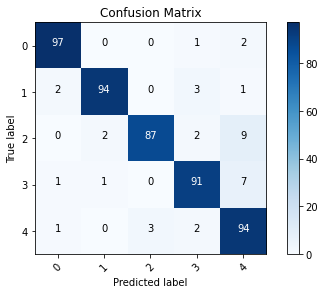

In [42]:
cm_plot_labels = ['0','1','2','3','4']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [43]:
model.save('flowerclassify_model.h5')

In [44]:
from keras.models import load_model
new_model = load_model('flowerclassify_model.h5')

In [45]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 